In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math

In [8]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_1000.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_1000.csv')
FF_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,158.700313,158.640037,158.459238,158.158008,157.736499,157.194924,156.533558,155.752734,154.852847,153.834352,...,16.982286,17.058793,17.129857,17.195470,17.255628,17.310329,17.359571,17.403357,17.441690,17.474578
1,23.453699,23.425170,23.339597,23.197017,22.997497,22.741125,22.428019,22.058321,21.632197,21.149841,...,2.981943,3.011907,3.041945,3.071973,3.101912,3.131684,3.161219,3.190445,3.219298,3.247715
2,71.950184,71.915288,71.810614,71.636207,71.392140,71.078515,70.695464,70.243148,69.721756,69.131507,...,1.276403,1.347048,1.417474,1.487645,1.557526,1.627084,1.696287,1.765104,1.833502,1.901452
3,41.881901,41.858587,41.788653,41.672126,41.509050,41.299486,41.043513,40.741227,40.392744,39.998193,...,1.151976,1.174562,1.197584,1.220999,1.244763,1.268836,1.293176,1.317745,1.342507,1.367426
4,26.452318,26.419103,26.319475,26.153484,25.921215,25.622785,25.258346,24.828082,24.332212,23.770986,...,6.852551,6.795046,6.735927,6.675228,6.612986,6.549238,6.484021,6.417372,6.349330,6.279934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,120.551176,120.504543,120.364663,120.131606,119.805483,119.386452,118.874713,118.270515,117.574147,116.785945,...,2.001514,2.022243,2.042219,2.061437,2.079895,2.097589,2.114517,2.130676,2.146066,2.160684
609,23.179887,23.152669,23.071029,22.935006,22.744663,22.500090,22.201403,21.848744,21.442279,20.982200,...,10.874587,10.898137,10.916890,10.930840,10.939983,10.944315,10.943840,10.938560,10.928482,10.913615
610,22.873782,22.847299,22.767861,22.635501,22.450279,22.212274,21.921590,21.578354,21.182714,20.734842,...,2.297753,2.298311,2.301421,2.307115,2.315413,2.326322,2.339834,2.355930,2.374578,2.395735
611,77.699142,77.662203,77.551407,77.366811,77.108512,76.776645,76.371382,75.892936,75.341556,74.717530,...,0.087853,0.089173,0.090459,0.091711,0.092929,0.094115,0.095271,0.096396,0.097494,0.098564


In [21]:
FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [34]:
FF_df = (FF_df-FF_df.mean())/FF_df.std()
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [35]:
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,...,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454
1,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,...,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992
2,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,...,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530
3,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,...,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067
4,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,...,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,...,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605
996,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,...,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067
997,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,...,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530
998,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,...,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992


In [36]:
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-0.294200,-0.044163,-0.158772,-0.102216,-0.074599,-0.015730,0.131284,-0.081743,-0.077974,-0.177768,...,-0.055551,-0.101055,-0.038837,-0.146226,-0.091844,-0.246525,-0.061988,-0.065855,-0.221840,-0.171756
1,-0.292794,-0.044933,-0.158864,-0.103937,-0.072333,-0.018592,0.127470,-0.081484,-0.078082,-0.177059,...,-0.052763,-0.100036,-0.038440,-0.146590,-0.088297,-0.246526,-0.058146,-0.064443,-0.221096,-0.161568
2,-0.291594,-0.045857,-0.158998,-0.105505,-0.070380,-0.021199,0.124128,-0.081372,-0.078023,-0.176453,...,-0.050439,-0.099186,-0.038112,-0.146993,-0.085541,-0.246554,-0.055243,-0.063196,-0.220447,-0.152265
3,-0.290572,-0.046893,-0.159164,-0.106928,-0.068713,-0.023557,0.121233,-0.081381,-0.077823,-0.175943,...,-0.048549,-0.098497,-0.037847,-0.147409,-0.083468,-0.246602,-0.053173,-0.062095,-0.219886,-0.143813
4,-0.289704,-0.048002,-0.159353,-0.108210,-0.067307,-0.025677,0.118758,-0.081488,-0.077505,-0.175519,...,-0.047061,-0.097962,-0.037638,-0.147812,-0.081976,-0.246665,-0.051833,-0.061124,-0.219405,-0.136177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.289874,-0.058796,-0.160646,-0.118818,-0.063502,-0.023457,0.099501,-0.086572,-0.080130,-0.174715,...,-0.059069,-0.095635,-0.037933,-0.146162,-0.083549,-0.247523,-0.064092,-0.068005,-0.218923,-0.106660
996,-0.290576,-0.059844,-0.161392,-0.119437,-0.063656,-0.020664,0.098601,-0.085230,-0.080704,-0.175168,...,-0.061687,-0.096630,-0.037735,-0.147324,-0.087303,-0.247791,-0.067091,-0.066524,-0.219307,-0.107422
997,-0.291405,-0.061129,-0.162317,-0.120112,-0.063917,-0.017593,0.097673,-0.083647,-0.081239,-0.175706,...,-0.064841,-0.097850,-0.037499,-0.148798,-0.091896,-0.248139,-0.070475,-0.064649,-0.219768,-0.108419
998,-0.292379,-0.062678,-0.163445,-0.120846,-0.064303,-0.014232,0.096712,-0.081813,-0.081726,-0.176337,...,-0.068590,-0.099311,-0.037224,-0.150627,-0.097412,-0.248579,-0.074276,-0.062359,-0.220311,-0.109673


In [27]:
names = []
for i in range(0,613):
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(1000),columns=[names])
#TD_df
#TD_df.index = names

for i in range(0,613):
    #print(TD_x_df[i])
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-4.006749,333.204245,-4.188136,334.485664,-3.638160,340.298044,-3.894873,334.684611,-3.844019,332.848038,...,-4.426408,330.493742,-3.773735,328.922594,-4.070915,330.865941,-4.221646,329.636917,-3.532301,322.430402
1,-3.998728,333.301271,-4.179751,334.446752,-3.630876,340.292436,-3.887075,334.604473,-3.836323,332.965807,...,-4.417547,330.493699,-3.766180,329.108402,-4.062765,330.935500,-4.213194,329.668245,-3.525229,323.005083
2,-3.990706,333.384047,-4.171366,334.400058,-3.623593,340.284275,-3.879278,334.531393,-3.828627,333.067351,...,-4.408685,330.492168,-3.758625,329.248797,-4.054615,330.996960,-4.204742,329.695568,-3.518157,323.529835
3,-3.982685,333.454514,-4.162982,334.347708,-3.616309,340.274152,-3.871480,334.465126,-3.820931,333.154029,...,-4.399823,330.489515,-3.751070,329.348917,-4.046465,331.051203,-4.196291,329.719203,-3.511086,324.006600
4,-3.974663,333.514435,-4.154597,334.291620,-3.609026,340.262600,-3.863683,334.405417,-3.813236,333.227141,...,-4.390962,330.486068,-3.743515,329.413720,-4.038315,331.099026,-4.187839,329.739456,-3.504014,324.437353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.974663,333.502666,4.154597,333.746028,3.609026,340.183673,3.863683,333.911290,3.813236,333.424946,...,4.390962,330.438897,3.743515,328.820851,4.038315,330.760029,4.187839,329.759767,3.504014,326.102352
996,3.982685,333.454239,4.162982,333.693082,3.616309,340.138196,3.871480,333.882464,3.820931,333.416930,...,4.399823,330.424158,3.751070,328.675811,4.046465,330.832970,4.196291,329.743567,3.511086,326.059361
997,3.990706,333.397063,4.171366,333.628124,3.623593,340.081703,3.879278,333.851028,3.828627,333.403345,...,4.408685,330.405018,3.758625,328.512185,4.054615,330.925391,4.204742,329.724185,3.518157,326.003098
998,3.998728,333.329871,4.179751,333.549796,3.630876,340.012917,3.887075,333.816843,3.836323,333.383277,...,4.417547,330.380817,3.766180,328.328325,4.062765,331.038182,4.213194,329.701307,3.525229,325.932369


In [28]:
input_data = FF_df.iloc[: , :-3]
output_data = TD_df.iloc[: , :-6]

In [37]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.015755,-0.670520,-0.250014,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.016233,-0.670950,-0.250566,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.017669,-0.672240,-0.252221,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.020061,-0.674390,-0.254978,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.023408,-0.677398,-0.258837,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.765111,-0.743381,-0.669381,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.765019,-0.743575,-0.669735,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.764926,-0.743771,-0.670089,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.764833,-0.743970,-0.670442,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230


In [38]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,605x,605y,606x,606y,607x,607y,608x,608y,609x,609y
0,-1.729454,-0.294200,-1.729454,-0.044163,-1.729454,-0.158772,-1.729454,-0.102216,-1.729454,-0.074599,...,-1.729454,-0.038837,-1.729454,-0.146226,-1.729454,-0.091844,-1.729454,-0.246525,-1.729454,-0.061988
1,-1.725992,-0.292794,-1.725992,-0.044933,-1.725992,-0.158864,-1.725992,-0.103937,-1.725992,-0.072333,...,-1.725992,-0.038440,-1.725992,-0.146590,-1.725992,-0.088297,-1.725992,-0.246526,-1.725992,-0.058146
2,-1.722530,-0.291594,-1.722530,-0.045857,-1.722530,-0.158998,-1.722530,-0.105505,-1.722530,-0.070380,...,-1.722530,-0.038112,-1.722530,-0.146993,-1.722530,-0.085541,-1.722530,-0.246554,-1.722530,-0.055243
3,-1.719067,-0.290572,-1.719067,-0.046893,-1.719067,-0.159164,-1.719067,-0.106928,-1.719067,-0.068713,...,-1.719067,-0.037847,-1.719067,-0.147409,-1.719067,-0.083468,-1.719067,-0.246602,-1.719067,-0.053173
4,-1.715605,-0.289704,-1.715605,-0.048002,-1.715605,-0.159353,-1.715605,-0.108210,-1.715605,-0.067307,...,-1.715605,-0.037638,-1.715605,-0.147812,-1.715605,-0.081976,-1.715605,-0.246665,-1.715605,-0.051833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.715605,-0.289874,1.715605,-0.058796,1.715605,-0.160646,1.715605,-0.118818,1.715605,-0.063502,...,1.715605,-0.037933,1.715605,-0.146162,1.715605,-0.083549,1.715605,-0.247523,1.715605,-0.064092
996,1.719067,-0.290576,1.719067,-0.059844,1.719067,-0.161392,1.719067,-0.119437,1.719067,-0.063656,...,1.719067,-0.037735,1.719067,-0.147324,1.719067,-0.087303,1.719067,-0.247791,1.719067,-0.067091
997,1.722530,-0.291405,1.722530,-0.061129,1.722530,-0.162317,1.722530,-0.120112,1.722530,-0.063917,...,1.722530,-0.037499,1.722530,-0.148798,1.722530,-0.091896,1.722530,-0.248139,1.722530,-0.070475
998,1.725992,-0.292379,1.725992,-0.062678,1.725992,-0.163445,1.725992,-0.120846,1.725992,-0.064303,...,1.725992,-0.037224,1.725992,-0.150627,1.725992,-0.097412,1.725992,-0.248579,1.725992,-0.074276


In [41]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[114, 25, 281, 250, 228, 142, 104, 558, 89, 432, 32, 30, 95, 223, 238, 517, 27, 574, 203, 602, 429, 225, 459, 284, 6, 163, 600, 348, 586, 159, 220, 344, 603, 94, 389, 99, 367, 352, 270, 44, 470, 549, 127, 387, 80, 300, 370, 196, 71, 46, 233, 296, 81, 595, 103, 575, 581, 464, 373, 166, 379, 363, 214, 273, 73, 175, 606, 167, 473, 388, 276, 224, 332, 57, 234, 599, 323, 410, 274, 67, 216, 322, 217, 511, 405, 469, 146, 271, 604, 252, 269, 438, 408, 563, 538, 141, 505, 93, 48, 440, 56, 78, 321, 557, 525, 582, 529, 305, 534, 197, 195, 502, 239, 571, 128, 283, 510, 482, 5, 504, 369, 58, 349, 453, 531, 384, 136, 393, 328, 174, 536, 150, 222, 565, 232, 1, 489, 448, 368, 134, 256, 390, 91, 259, 54, 445, 320, 152, 430, 327, 466, 311, 101, 508, 191, 468, 82, 539, 398, 522, 0, 306, 165, 543, 9, 479, 185, 425, 413, 157, 122, 29, 123, 290, 40, 43, 374, 248, 417, 35, 554, 272, 392, 64, 65, 337, 243, 607, 84, 135, 496, 310, 503, 108, 452, 386, 551, 353, 102, 365, 580, 204, 343, 537, 455, 515, 264, 231, 

In [43]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [44]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 2000, 1)
(122, 1000)
(122, 2000, 1)


In [116]:
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
x = layers.Dense(1500, activation="relu")(x)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
x = layers.Dense(1000, activation="relu")(x)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
x = layers.Dense(500, activation="relu")(x)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
x = layers.Dense(250, activation="relu")(x)
outputs = layers.Dense(2000)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_input_values, train_output_values, batch_size=50, epochs=500, validation_split=0.2)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_46 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_47 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_48 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_49 (Dense)            (None, 500)               500500    
                                                                 
 dense_50 (Dense)            (None, 250)               125250    
                                                                 
 dense_51 (Dense)            (None, 2000)              5020

8/8 [==============================] - 1s 104ms/step - loss: 0.0671 - val_loss: 0.0556
Epoch 70/500
8/8 [==============================] - 1s 107ms/step - loss: 0.0640 - val_loss: 0.0578
Epoch 71/500
8/8 [==============================] - 1s 107ms/step - loss: 0.0714 - val_loss: 0.0614
Epoch 72/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0789 - val_loss: 0.0763
Epoch 73/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0831 - val_loss: 0.0680
Epoch 74/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0768 - val_loss: 0.0677
Epoch 75/500
8/8 [==============================] - 1s 107ms/step - loss: 0.0723 - val_loss: 0.0572
Epoch 76/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0683 - val_loss: 0.0571
Epoch 77/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0647 - val_loss: 0.0546
Epoch 78/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0637 - val_loss: 0.0667
Epoch 79/500


8/8 [==============================] - 1s 104ms/step - loss: 0.0350 - val_loss: 0.0549
Epoch 151/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0335 - val_loss: 0.0573
Epoch 152/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0297 - val_loss: 0.0574
Epoch 153/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0284 - val_loss: 0.0548
Epoch 154/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0304 - val_loss: 0.0591
Epoch 155/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0286 - val_loss: 0.0526
Epoch 156/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0292 - val_loss: 0.0500
Epoch 157/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0303 - val_loss: 0.0564
Epoch 158/500
8/8 [==============================] - 1s 106ms/step - loss: 0.0318 - val_loss: 0.0528
Epoch 159/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0328 - val_loss: 0.0514
Epoc

8/8 [==============================] - 1s 119ms/step - loss: 0.0156 - val_loss: 0.0466
Epoch 232/500
8/8 [==============================] - 1s 122ms/step - loss: 0.0135 - val_loss: 0.0493
Epoch 233/500
8/8 [==============================] - 1s 121ms/step - loss: 0.0129 - val_loss: 0.0480
Epoch 234/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0110 - val_loss: 0.0493
Epoch 235/500
8/8 [==============================] - 1s 108ms/step - loss: 0.0121 - val_loss: 0.0537
Epoch 236/500
8/8 [==============================] - 1s 112ms/step - loss: 0.0142 - val_loss: 0.0483
Epoch 237/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0125 - val_loss: 0.0489
Epoch 238/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0118 - val_loss: 0.0468
Epoch 239/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0138 - val_loss: 0.0532
Epoch 240/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0138 - val_loss: 0.0486
Epoc

8/8 [==============================] - 1s 105ms/step - loss: 0.0054 - val_loss: 0.0449
Epoch 313/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0042 - val_loss: 0.0483
Epoch 314/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0059 - val_loss: 0.0456
Epoch 315/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0067 - val_loss: 0.0552
Epoch 316/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0079 - val_loss: 0.0500
Epoch 317/500
8/8 [==============================] - 1s 108ms/step - loss: 0.0064 - val_loss: 0.0500
Epoch 318/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0070 - val_loss: 0.0449
Epoch 319/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0072 - val_loss: 0.0471
Epoch 320/500
8/8 [==============================] - 1s 107ms/step - loss: 0.0054 - val_loss: 0.0483
Epoch 321/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0061 - val_loss: 0.0516
Epoc

8/8 [==============================] - 1s 105ms/step - loss: 0.0036 - val_loss: 0.0476
Epoch 394/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0042 - val_loss: 0.0454
Epoch 395/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0046 - val_loss: 0.0536
Epoch 396/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0094 - val_loss: 0.0449
Epoch 397/500
8/8 [==============================] - 1s 106ms/step - loss: 0.0154 - val_loss: 0.0522
Epoch 398/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0127 - val_loss: 0.0556
Epoch 399/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0118 - val_loss: 0.0487
Epoch 400/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0123 - val_loss: 0.0485
Epoch 401/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0105 - val_loss: 0.0468
Epoch 402/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0096 - val_loss: 0.0514
Epoc

8/8 [==============================] - 1s 103ms/step - loss: 0.0127 - val_loss: 0.0525
Epoch 475/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0088 - val_loss: 0.0480
Epoch 476/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0089 - val_loss: 0.0496
Epoch 477/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0085 - val_loss: 0.0474
Epoch 478/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0108 - val_loss: 0.0475
Epoch 479/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0068 - val_loss: 0.0497
Epoch 480/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0058 - val_loss: 0.0467
Epoch 481/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0072 - val_loss: 0.0485
Epoch 482/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0073 - val_loss: 0.0462
Epoch 483/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0059 - val_loss: 0.0488
Epoc

4/4 [==============================] - 0s 12ms/step


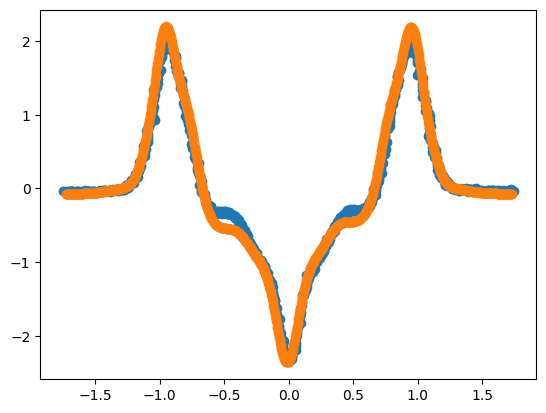

In [117]:
prediction = model.predict(test_input_values)
x_1 = prediction[0][0:1000]
y_1 = prediction[0][1000:]
plt.scatter(x_1,y_1)

x_2 = test_output_values[0][0:1000]
y_2 = test_output_values[0][1000:]
plt.scatter(x_2,y_2)
plt.show()

4/4 [==============================] - 0s 12ms/step


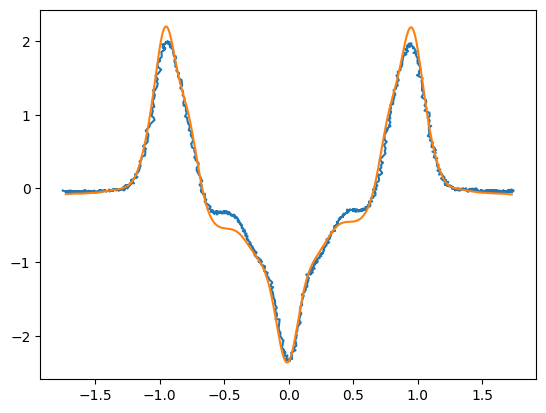

In [118]:
prediction = model.predict(test_input_values)
x_1 = prediction[0][0:1000]
y_1 = prediction[0][1000:]
plt.plot(x_1,y_1)

x_2 = test_output_values[0][0:1000]
y_2 = test_output_values[0][1000:]
plt.plot(x_2,y_2)
plt.show()

In [119]:
prediction = model.predict(test_input_values)

index = 0
MSE = 0
for data in prediction:
    p_x = data[0:1000]
    p_y = data[1000:]
    t_x = test_output_values[index][0:1000].tolist()
    t_y = test_output_values[index][1000:].tolist()
    
    sum_x = 0
    sum_y = 0
    for i in range(0,1000):
        sum_x = sum_x + (t_x[i]-p_x[i])**2
        sum_y = sum_y + (t_y[i]-p_y[i])**2
        
    MSE = MSE + math.sqrt(sum_x+sum_y)
    index = index + 1

MSE = MSE/len(prediction)
print(MSE)

4/4 [==============================] - 0s 12ms/step
8.016436025966755


4/4 [==============================] - 0s 14ms/step


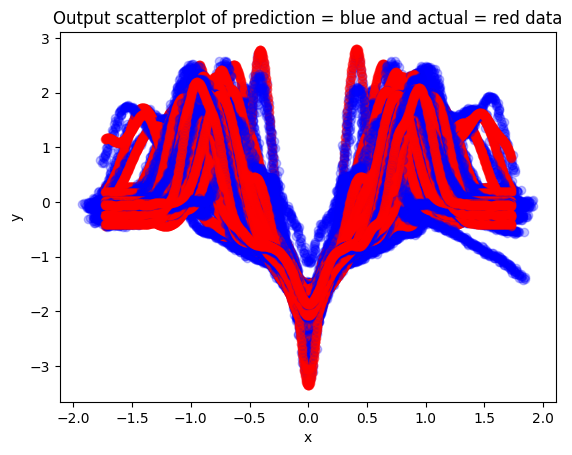

In [120]:
index = 0
for points in model.predict(test_input_values):
    p_x = points[0:1000]
    p_y = points[1000:]
    plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
    t_x = test_output_values[index][0:1000].tolist()
    t_y = test_output_values[index][1000:].tolist()
    plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
    index = index + 1

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output scatterplot of prediction = blue and actual = red data')
#plt.legend()
plt.show()